<a href="https://colab.research.google.com/github/hoon-i/ML-with-Math/blob/main/fack_bill_knn_classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np

#데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/hoon-i/ML-with-Math/main/fake_bills_data.csv", sep = ';')

#데이터 확인
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [46]:
df.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25
1499,False,171.47,104.15,103.82,4.63,3.37,112.07


In [47]:
df.shape

(1500, 7)

In [48]:
df['is_genuine'].unique()

array([ True, False])

In [49]:
#one-hot encoding
onehotdf= pd.get_dummies(df['is_genuine'])

onehotdf

,False,True
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
1495,True,False
1496,True,False
1497,True,False
1498,True,False


In [50]:
#one-hot encoding 한것 기존 데이터에
dff = pd.concat([onehotdf, df], axis=1)
dff

,False,True,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,True,True,171.81,104.86,104.95,4.52,2.89,112.83
1,False,True,True,171.46,103.36,103.66,3.77,2.99,113.09
2,False,True,True,172.69,104.48,103.50,4.40,2.94,113.16
3,False,True,True,171.36,103.91,103.94,3.62,3.01,113.51
4,False,True,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...,...,...
1495,True,False,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,True,False,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,True,False,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,True,False,False,172.06,104.28,104.06,5.17,3.46,112.25


In [51]:
#정답을 0과 1로 변환
df.iloc[:, 0] = df.iloc[:, 0].map({True: 1, False: 0})
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


<Axes: >

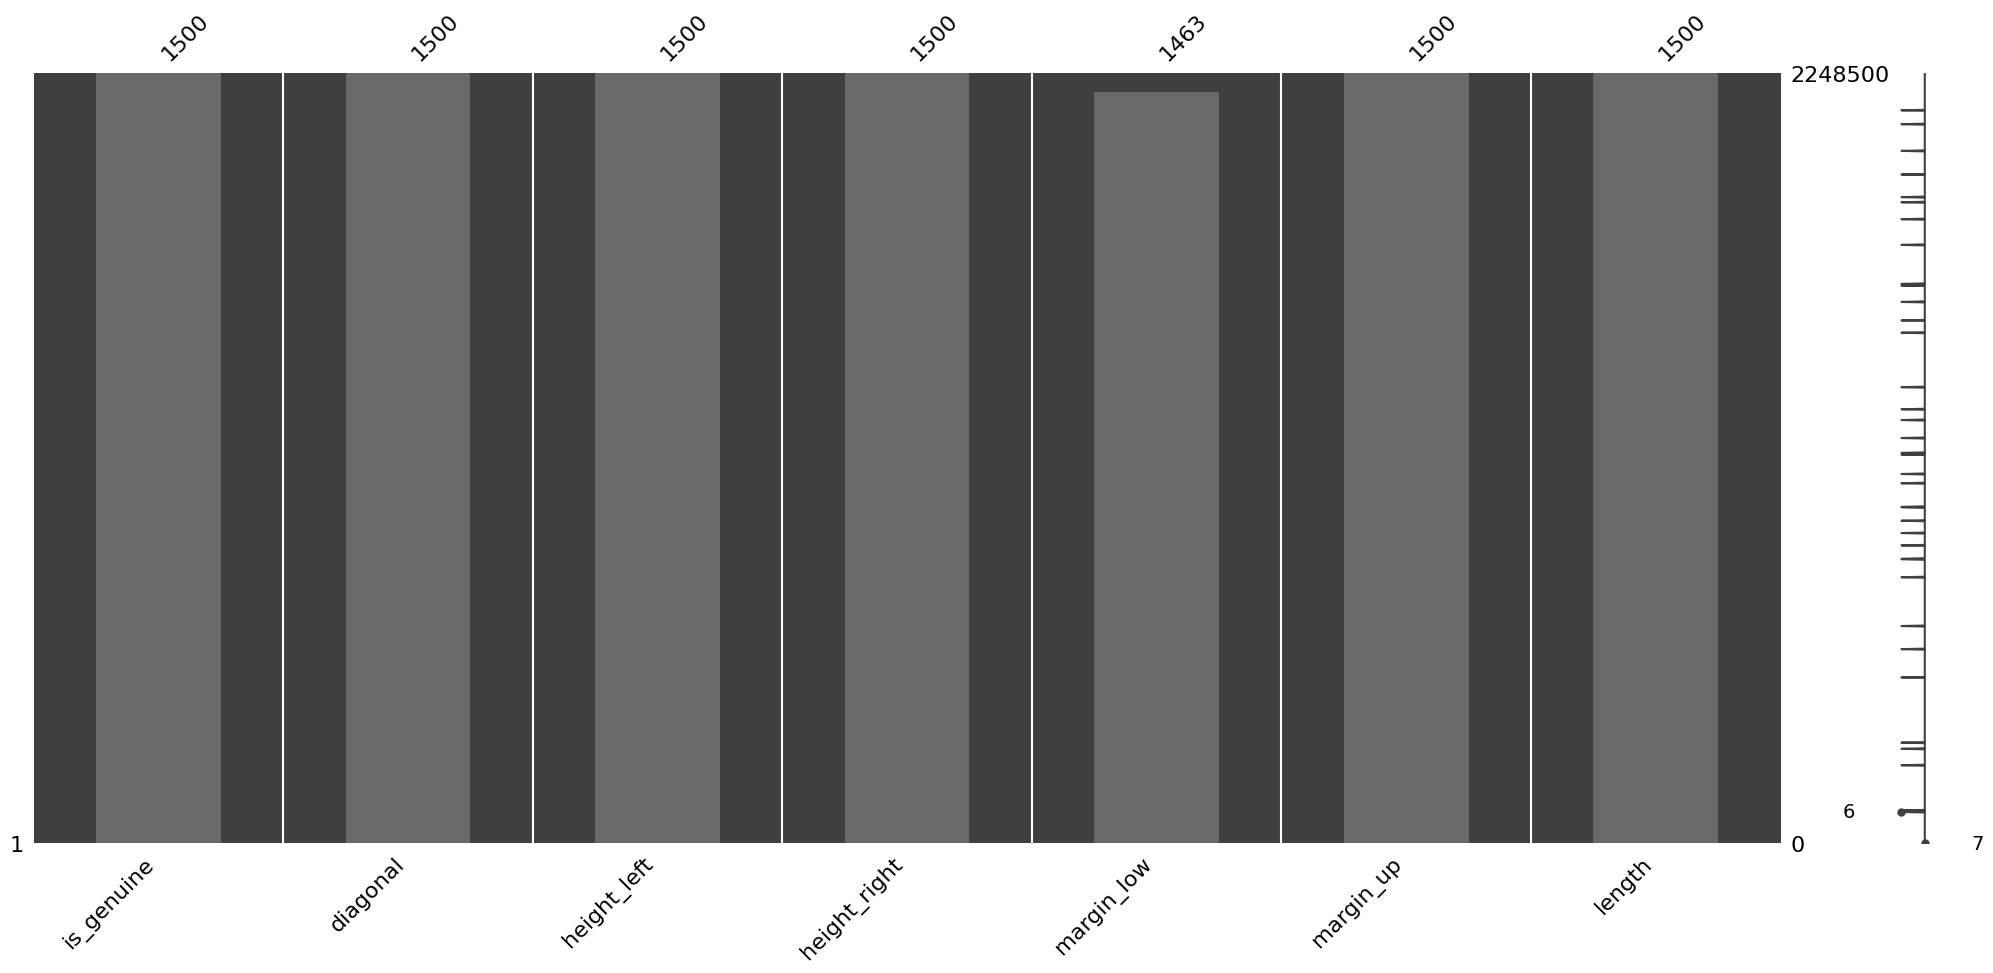

In [52]:
import missingno as msno

#결측치 확인

msno.matrix(df)
msno.bar(df)


In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#결측치 처리 (knn사용해서 결측치 처리 -> n_neighbors=5 주변 5개를 보고 결정)
imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df)
df = pd.DataFrame(df_imputed, columns=df.columns)
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1.0,171.81,104.86,104.95,4.52,2.89,112.83
1,1.0,171.46,103.36,103.66,3.77,2.99,113.09
2,1.0,172.69,104.48,103.50,4.40,2.94,113.16
3,1.0,171.36,103.91,103.94,3.62,3.01,113.51
4,1.0,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0.0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0.0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0.0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0.0,172.06,104.28,104.06,5.17,3.46,112.25


<Axes: >

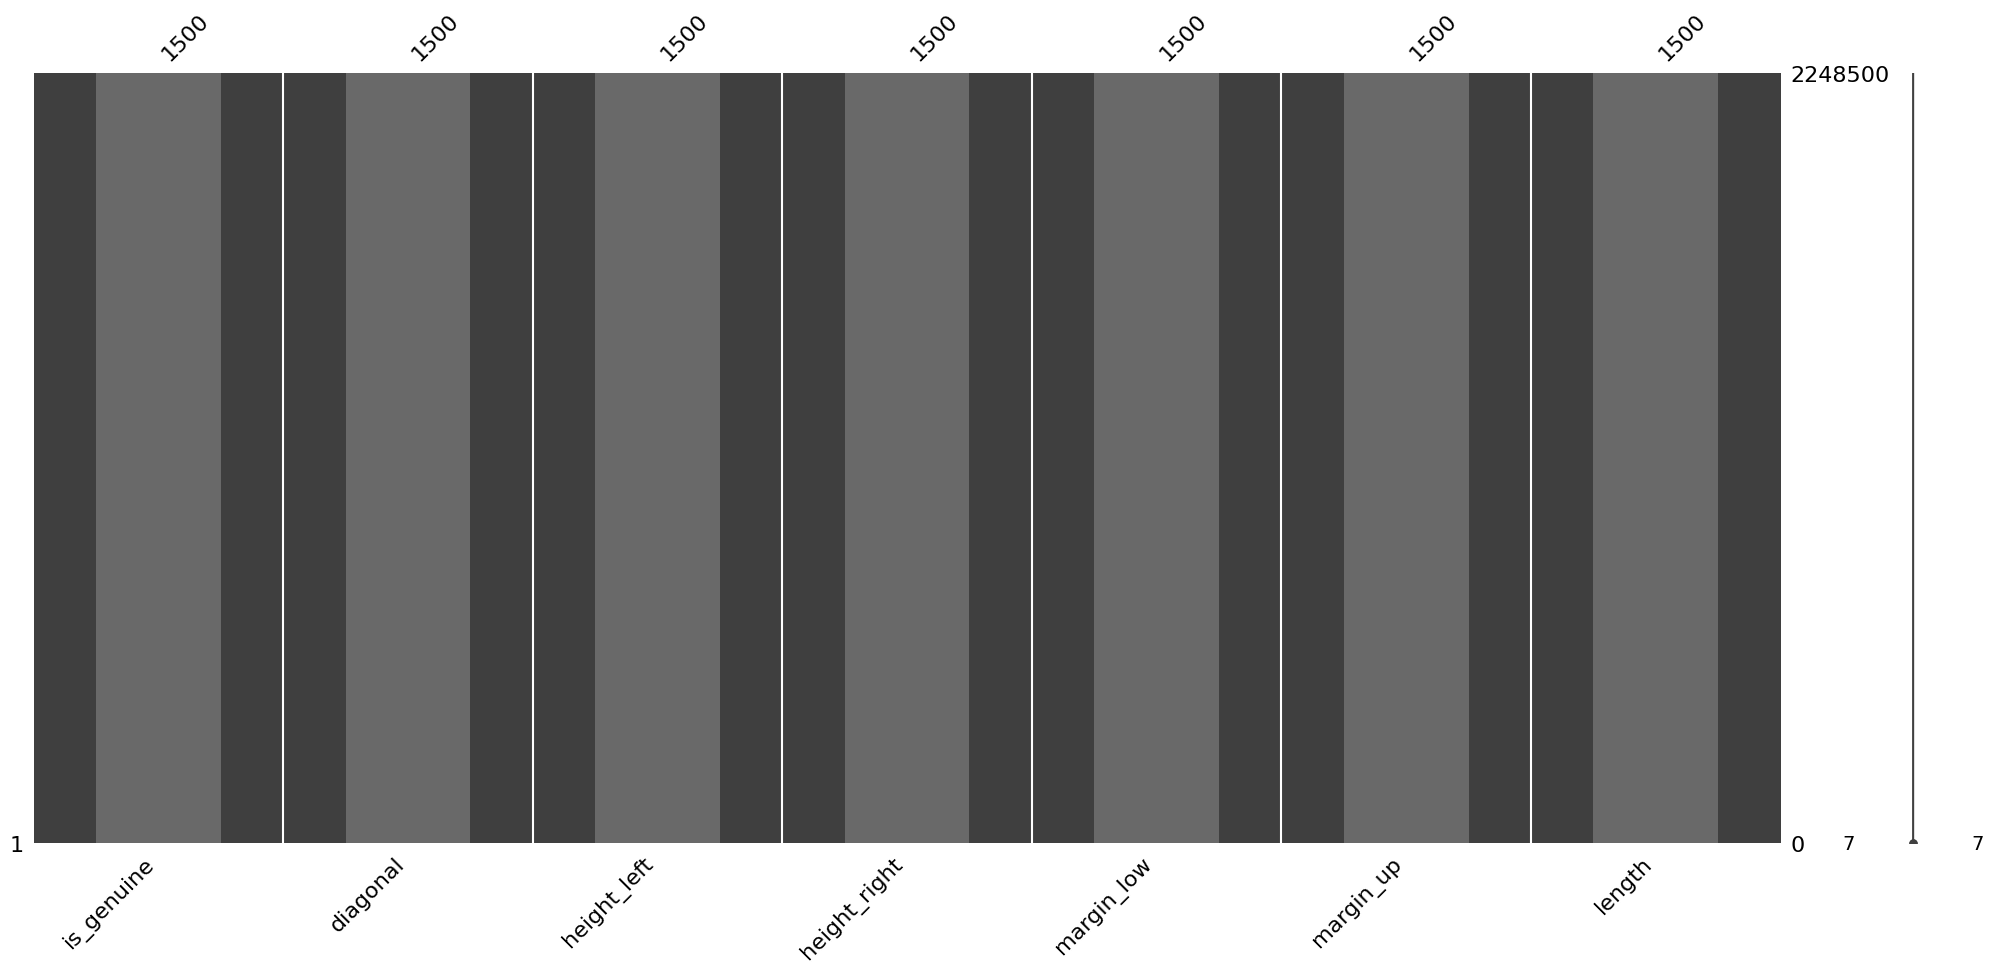

In [54]:
#결측치 확인
msno.matrix(df)
msno.bar(df)

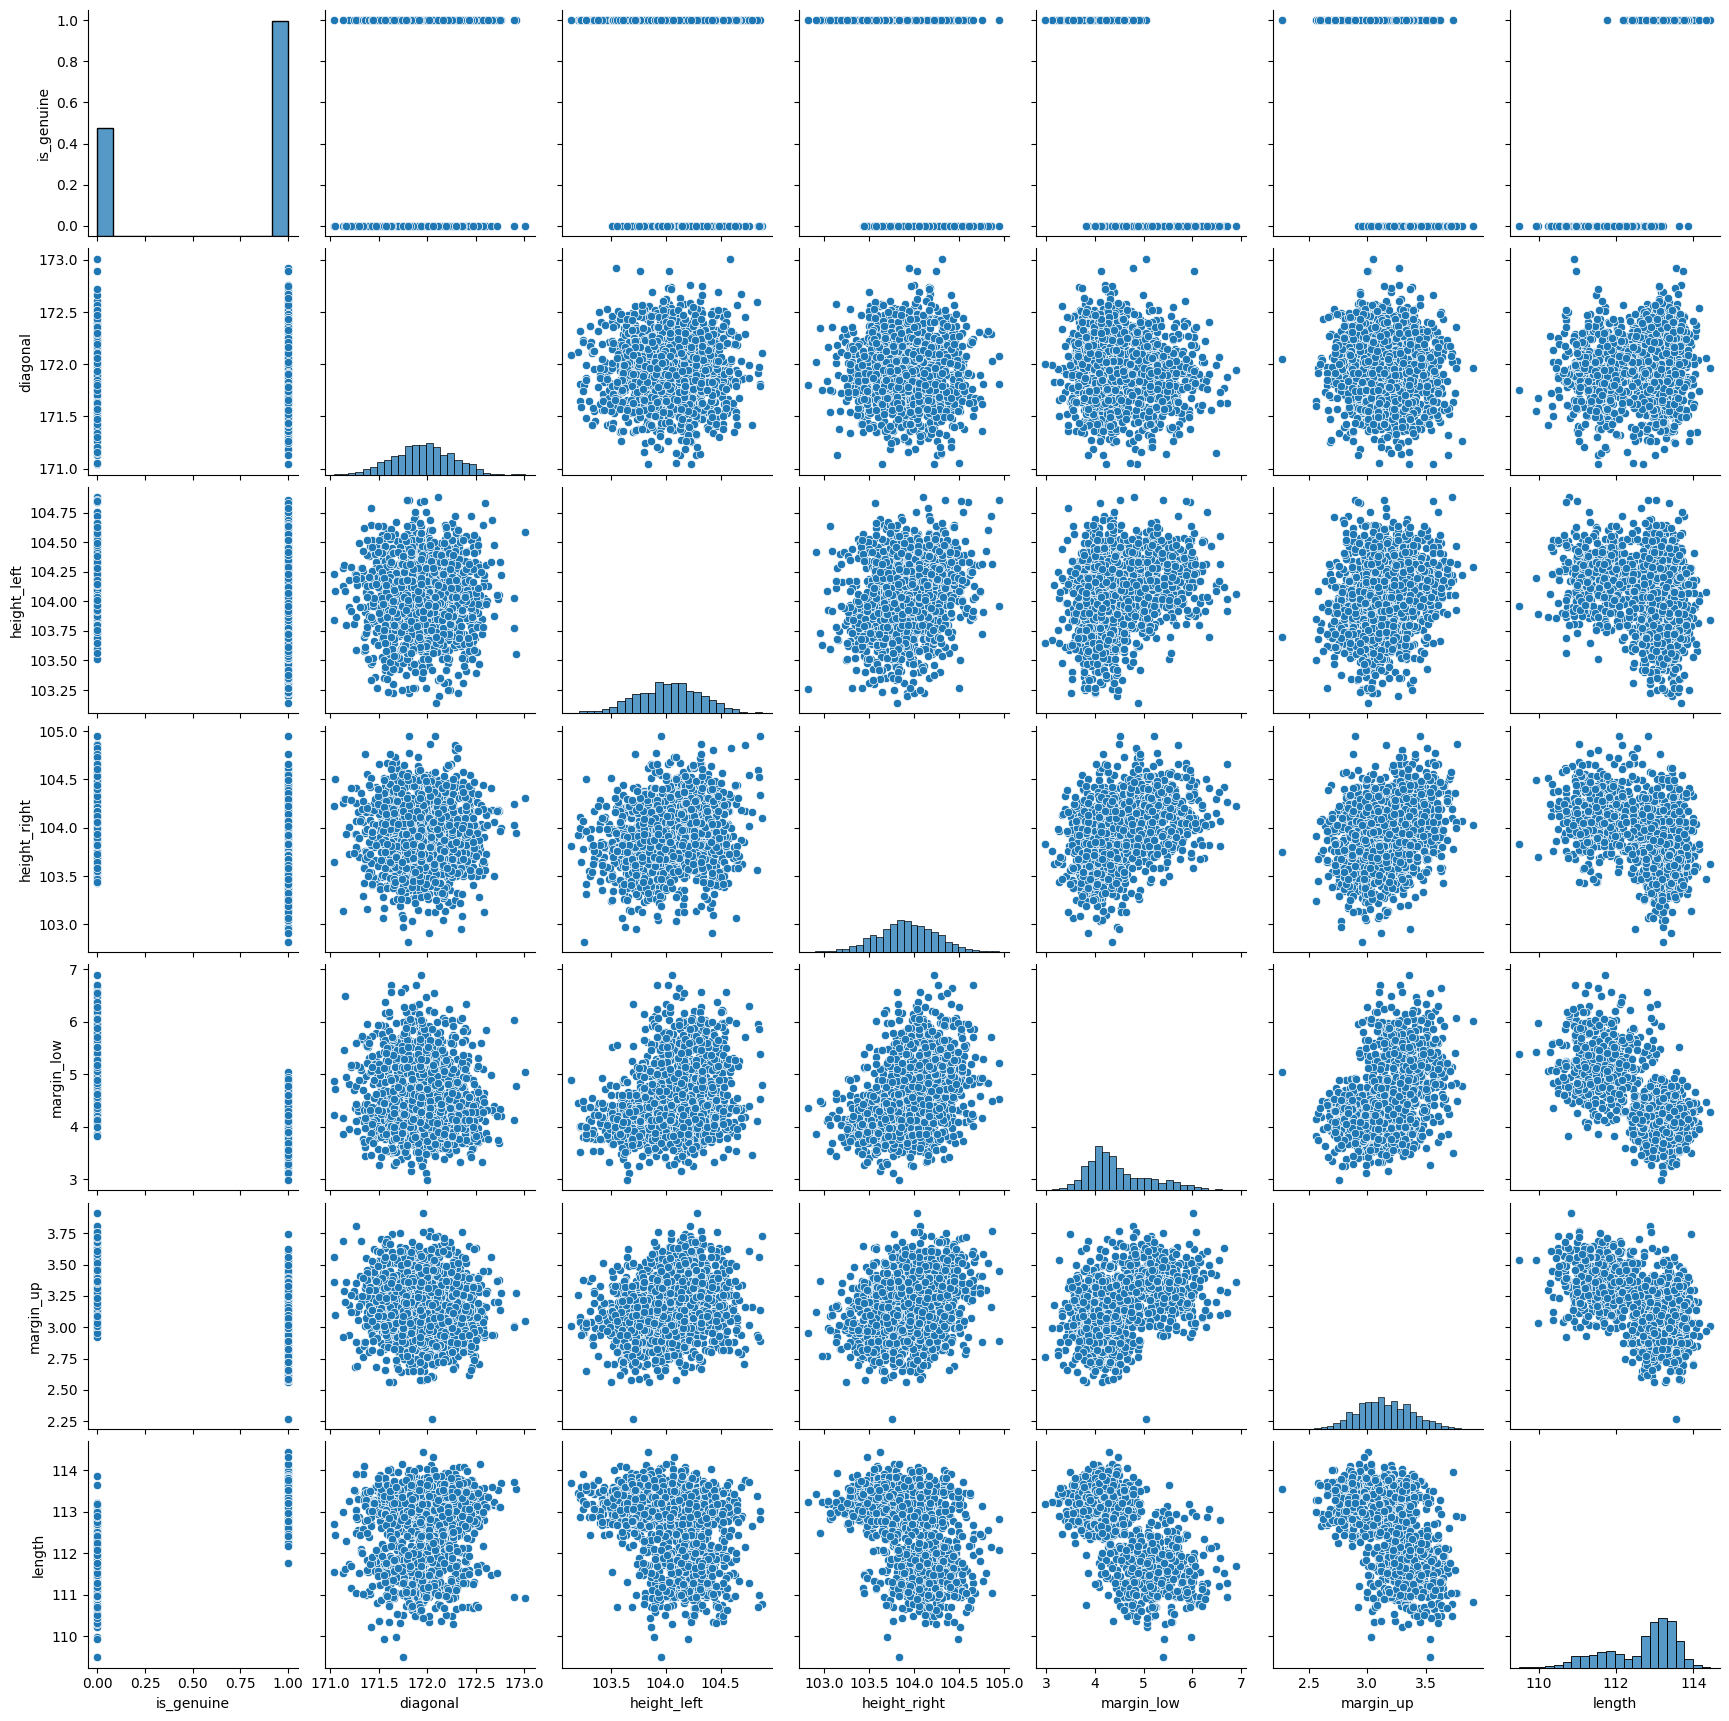

Correlation Matrix:
[[ 1.          0.13275633 -0.37983292 -0.48509183 -0.78549556 -0.60626226
   0.84928463]
 [ 0.13275633  1.          0.01947232 -0.02449201 -0.1112286  -0.05564888
   0.09758729]
 [-0.37983292  0.01947232  1.          0.24227881  0.30787219  0.24652224
  -0.32086276]
 [-0.48509183 -0.02449201  0.24227881  1.          0.39014883  0.30700464
  -0.40175122]
 [-0.78549556 -0.1112286   0.30787219  0.39014883  1.          0.42843724
  -0.66707515]
 [-0.60626226 -0.05564888  0.24652224  0.30700464  0.42843724  1.
  -0.52057513]
 [ 0.84928463  0.09758729 -0.32086276 -0.40175122 -0.66707515 -0.52057513
   1.        ]]


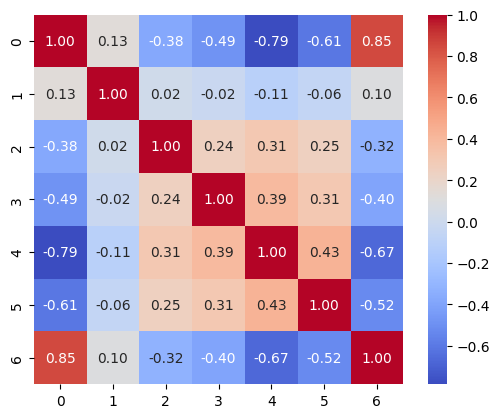

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as py

#pairplot과 np.corrcoef을 이용한 자료 확인하는 간단한 EDA
sns.pairplot(df)
plt.show()

# 변수 간의 상관 계수 계산
correlation_matrix = np.corrcoef(df.values.T)
print("Correlation Matrix:")
print(correlation_matrix)

#히트맵
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.show()

In [56]:
# 표준화 (standarization으로 Normalization 진행)
scaler = StandardScaler()
scdf = scaler.fit_transform(df)
scdf

array([[ 0.70710678, -0.48653957,  2.77412327, ...,  0.05461495,
        -1.128325  ,  0.17365114],
       [ 0.70710678, -1.63372936, -2.23653528, ..., -1.08248061,
        -0.69679916,  0.47166629],
       [ 0.70710678,  2.3978233 ,  1.50475644, ..., -0.12732034,
        -0.91256208,  0.55190114],
       ...,
       [-1.41421356, -0.51931643, -0.06524991, ...,  1.5555811 ,
         0.89984645, -0.83501554],
       [-1.41421356,  0.3328817 ,  0.83666863, ...,  1.04009777,
         1.33137229, -0.4911519 ],
       [-1.41421356, -1.6009525 ,  0.40241156, ...,  0.22138897,
         0.94299904, -0.69747008]])

In [65]:
# 데이터 train과 test로 분류하기
X = df.iloc[:,1:8]
y = df.loc[:,'is_genuine']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify = y)


In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#knn 모델정의
knn = KNeighborsClassifier(n_neighbors=7)

# 적용
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [67]:
#test 값에 대한 예측
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n", y_pred)

print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

테스트 세트에 대한 예측값:
 [1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 

In [68]:
knn.score(X_test, y_test)

0.9973333333333333

In [69]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

테스트 세트의 정확도: 1.00


In [70]:
knn.score(X_test, y_test)

0.9973333333333333

In [71]:
# grid search 적
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}

gs = GridSearchCV(knn, grid_params, cv = 10) ##, cv=10 -> cross-validation
gs.fit(X_train, y_train)

print("Best Parameters : ", gs.best_params_)
print("Best Score : ", gs.best_score_)
print("Best Test Score : ", gs.score(X_test, y_test))

Best Parameters :  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best Score :  0.9893331226295828
Best Test Score :  0.9973333333333333


In [72]:
knn_best = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 5, weights = 'uniform')
knn_best.fit(X_train, y_train)

print('*** 정확도 *** \n   {}'.format(knn_best.score(X_test, y_test)))

*** 정확도 *** 
   0.9973333333333333
